In [3]:
import requests
import json
import numpy as np

from datetime import datetime
import matplotlib.pyplot as plt

In [11]:
# TheGraph GraphQL queries
# Subgraph ID: QmWTrJJ9W8h3JE19FhCzzPYsJ2tgXZCdUqnbyuo64ToTBN
# Subgraph URL: https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2

# Data generated from TheGraph Uniswap v2 public, hosted API at https://thegraph.com/explorer/subgraph/uniswap/uniswap-v2
# Token ID for WETH: 0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
# Token ID for WBTC: 0x2260fac5e5542a773aa44fbcfedf7c193bc2c599

# Sample GraphQL query:
# Daily price data for WETH in USD. Change the token ID e.g. to WBTC above to test another token.

query = """query {
    tokenDayDatas(first:100, where: {token: "0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2"}, orderBy: date, orderDirection: desc) {
      date
      priceUSD
    }
}"""

# Call the public hosted TheGraph endpoint
url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2'
r = requests.post(url, json={'query': query})
print(r.status_code)


200


In [12]:
# The request returns a json structured string. First we transform the string into a json object:
json_data = json.loads(r.text)

# Next step is to convert the json object to an array, there are many ways to do this. Here is one 
# example that iterates over the data and converts it into float numbers (the price) and datetime objects 
# (the timestamps) while appending it to an initally empty array.

# Create an empty Numpy array
arr = np.empty((0,2), int)

# Populate the Numpy array, while converting Unix timestamps to datetime objects, and price to float numbers
for l in json_data['data']['tokenDayDatas']:
    arr = np.append(arr, np.array([[datetime.fromtimestamp(l['date']), np.float(l['priceUSD'])]]), axis=0)
    

# Now you have the data in a Numpy array, and you can basically do anything with it. Explore with Numpy and SciPy, or SciKitLearn for machine learning.

Text(0, 0.5, 'usd')

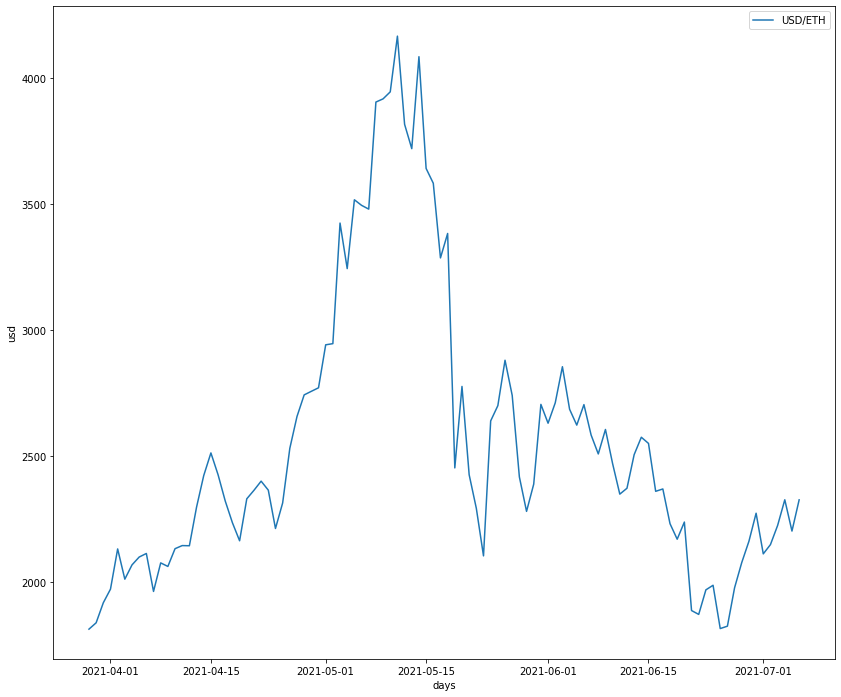

In [13]:
# Plot the data
f, ax = plt.subplots(1,1,figsize=(14,12))
ax.plot((arr[:,0]),arr[:,1], label='USD/ETH' )
ax.legend()
ax.set_xlabel('days')
ax.set_ylabel('usd')
#ax.set_yscale('log')

In [131]:
# Some people prefer to work with data in Pandas instead.

import pandas as pd

df = pd.DataFrame(arr, columns=['Date','Price'])

pd.set_option("display.max_rows", 10, "display.max_columns", None)
print(df)

         Date        Price
0  2021-07-02  2050.699509
1  2021-07-01  2112.518654
2  2021-06-30  2273.813596
3  2021-06-29  2162.451817
4  2021-06-28   2078.09866
..        ...          ...
95 2021-03-29  1813.626858
96 2021-03-28  1685.849088
97 2021-03-27   1716.94613
98 2021-03-26  1696.799547
99 2021-03-25  1591.091068

[100 rows x 2 columns]


In [ ]:
# With the TheGraph data in a Numpy array or Pandas dataframe the sky is the limit for what can be done next.